# PCA - Principal Component Analysis
### Principal component analysis (PCA) can be used in detecting outliers. PCA is a linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

### In this procedure, covariance matrix of the data can be decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

### Therefore, a low dimensional hyperplane constructed by k eigenvectors can capture most of the variance in the data. However, outliers are different from normal data points, which is more obvious on the hyperplane constructed by the eigenvectors with small eigenvalues.

### Therefore, outlier scores can be obtained as the sum of the projected distance of a sample on all eigenvectors
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.pca

### Arguments that work with PCA algorithm:
1. n_components
2. n_selected_components
3. contamination
4. copy
5. whiten
6. svd_solver
7. tol
8. iterated_power
9. random_state
10. weighted
11. standardization

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=7, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   280.878767 seconds
image downsampling       ...took     4.849030 seconds
image downsampling       ...took     8.158719 seconds
image downsampling       ...took    11.455124 seconds
image downsampling       ...took    14.761287 seconds
image downsampling       ...took    18.086919 seconds
image downsampling       ...took    21.394438 seconds
image downsampling       ...took    28.807234 seconds
image downsampling       ...took    36.218788 seconds
image downsampling       ...took    39.818756 seconds
image downsampling       ...took    59.333807 seconds
image downsampling       ...took    69.264577 seconds
image downsampling       ...took    72.575367 seconds
image downsampling       ...took    75.904784 seconds
image downsampling       ...took    83.339586 seconds
image downsampling       ...took    86.660694 seconds
image downsampling       ...took    89.973562 seconds
image downsampling       ...took    93.500917 seconds
image downsampling       ...

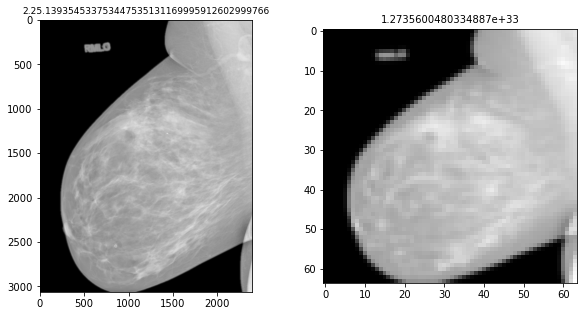

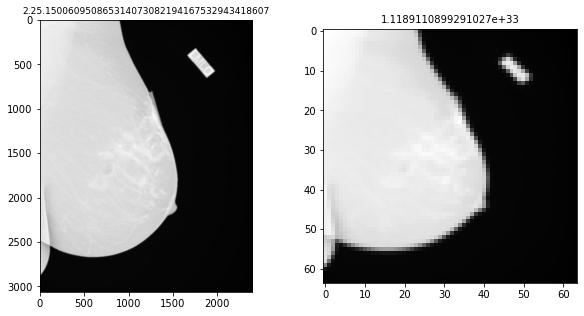

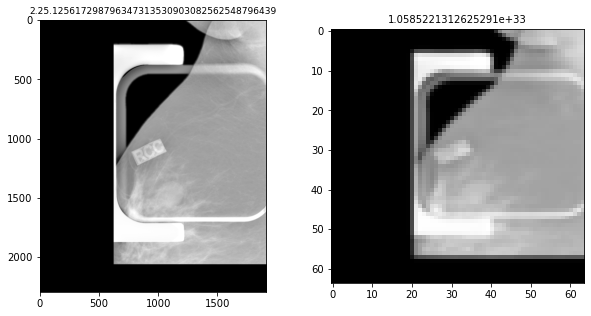

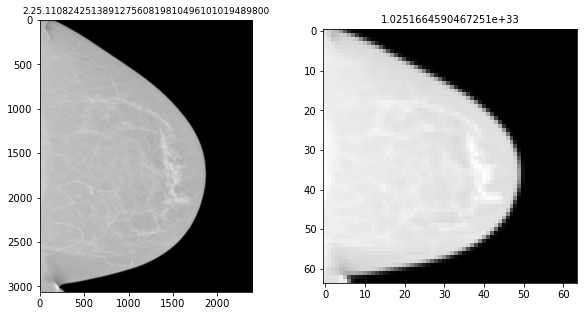

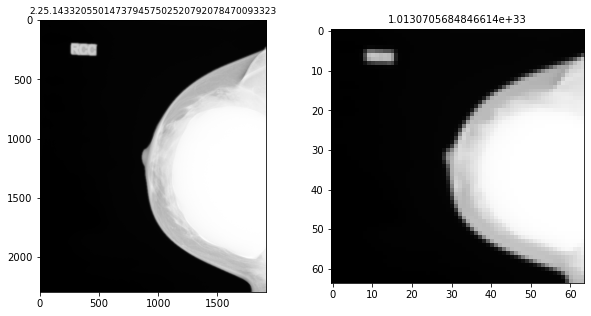

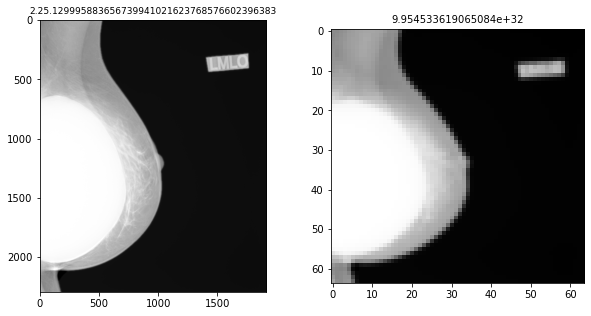

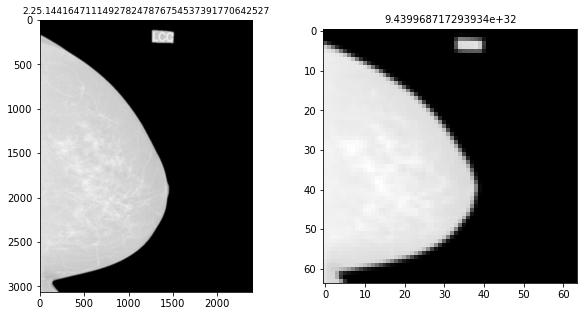

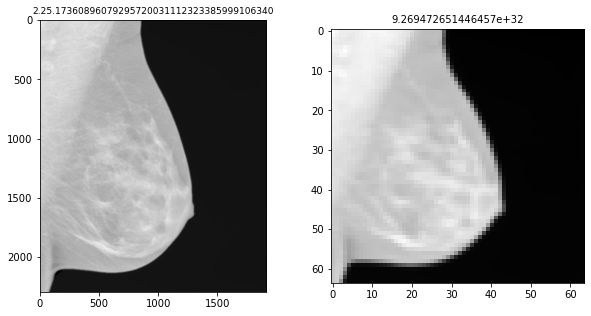

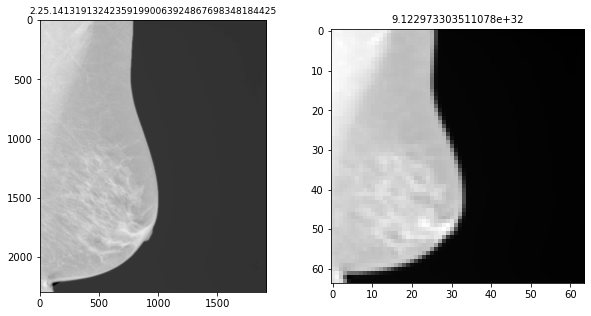

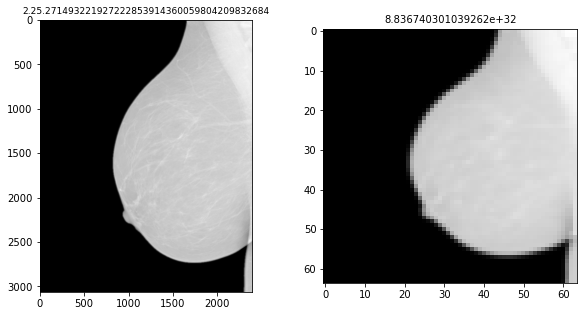

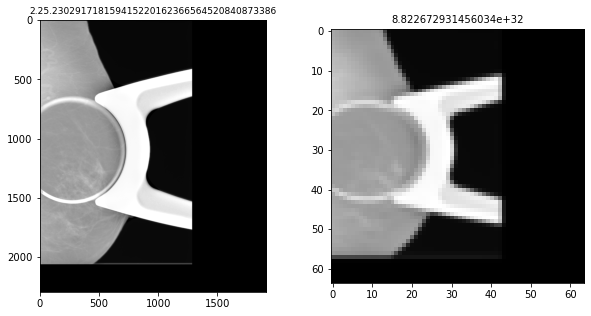

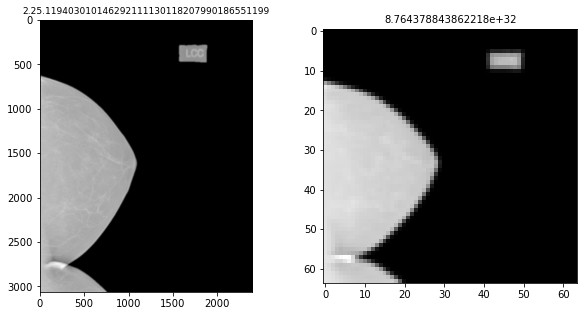

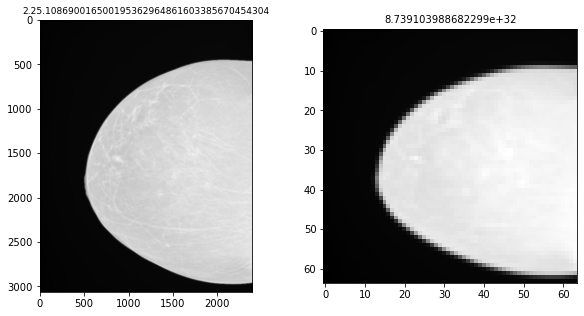

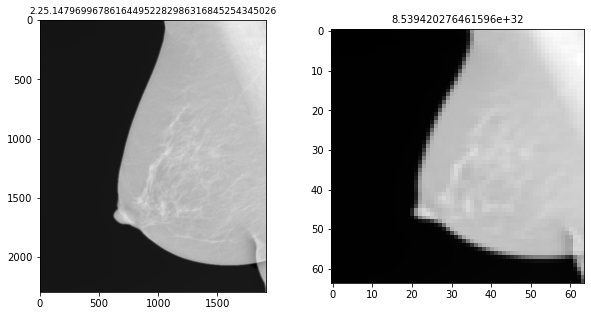

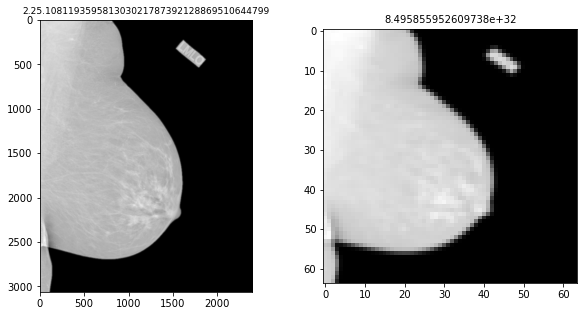

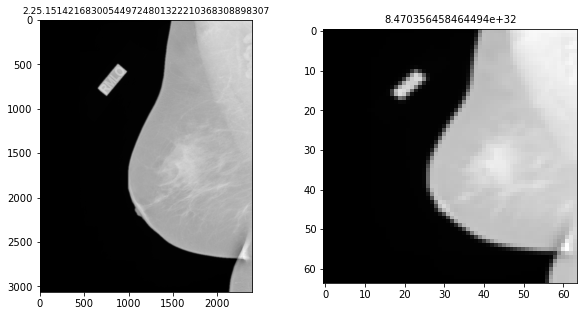

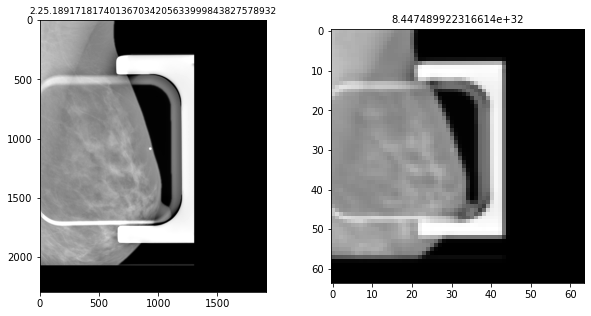

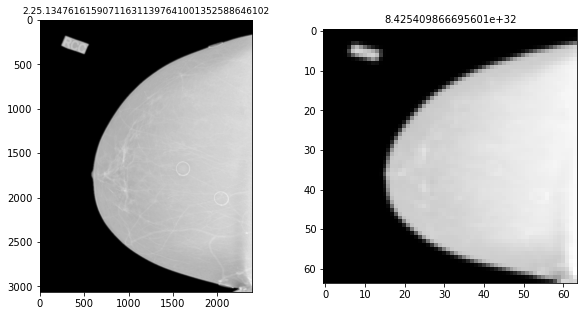

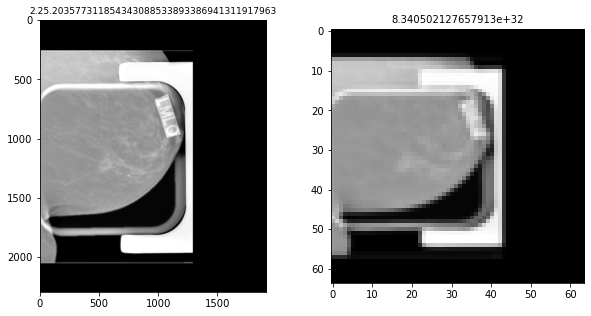

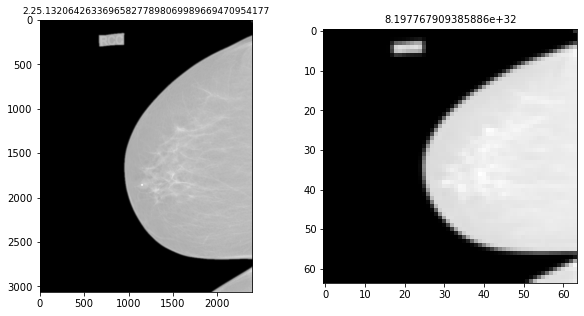

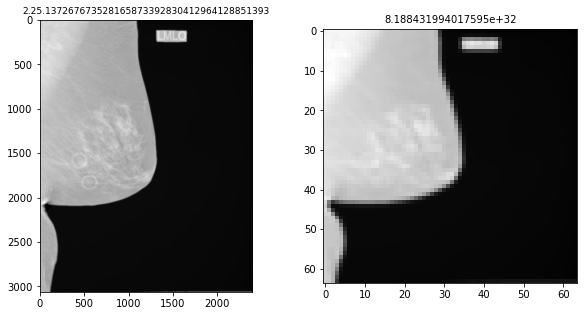

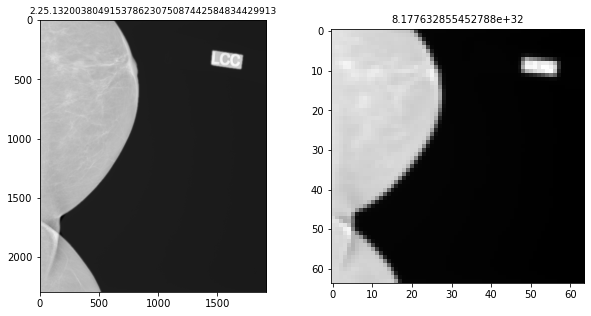

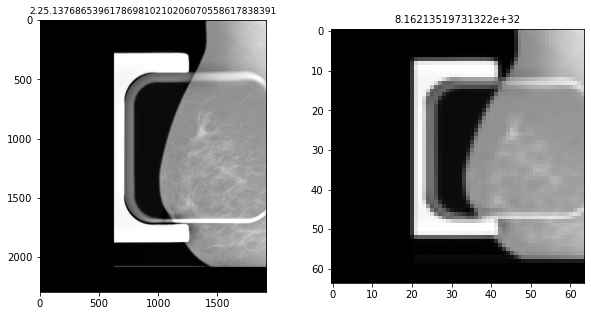

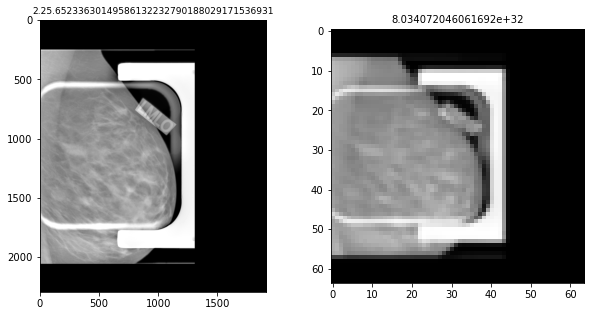

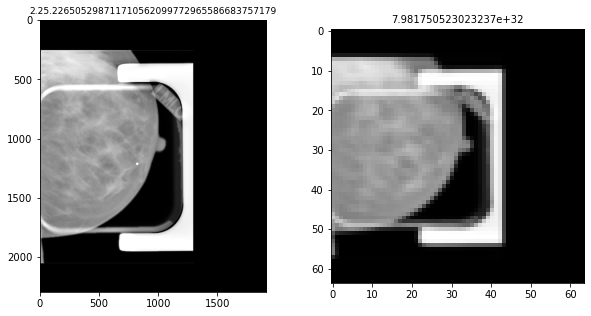

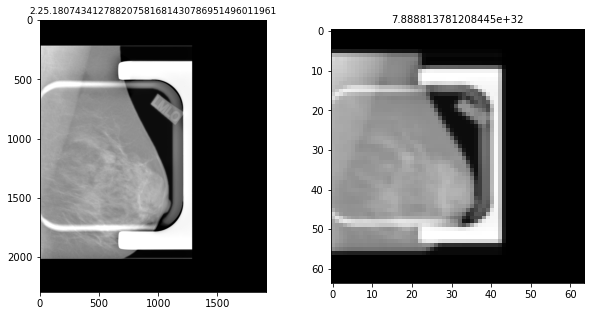

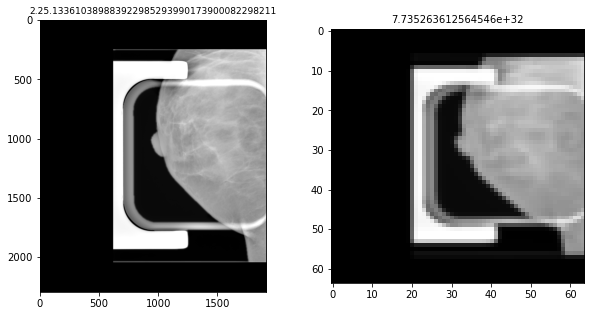

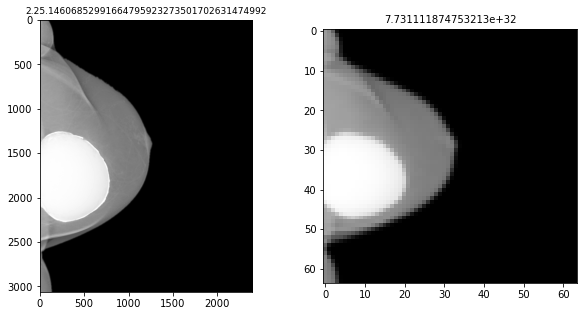

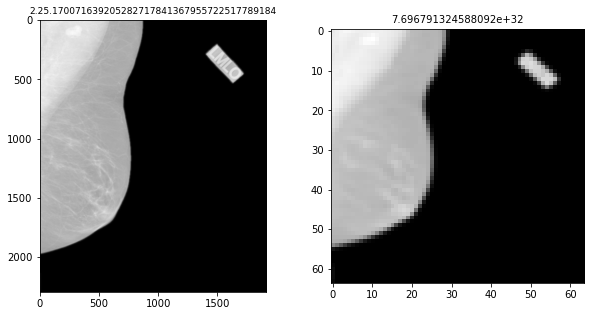

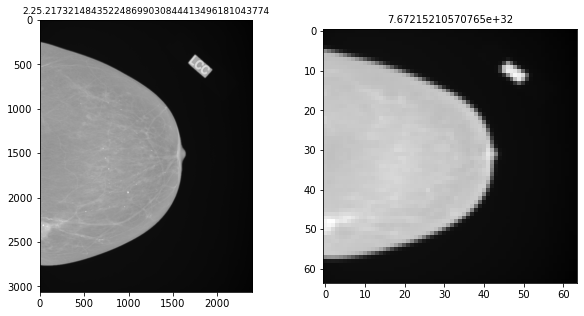

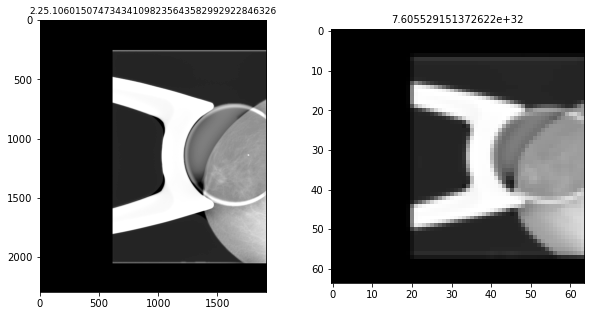

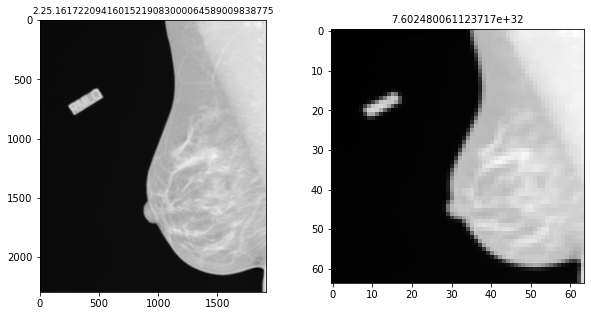

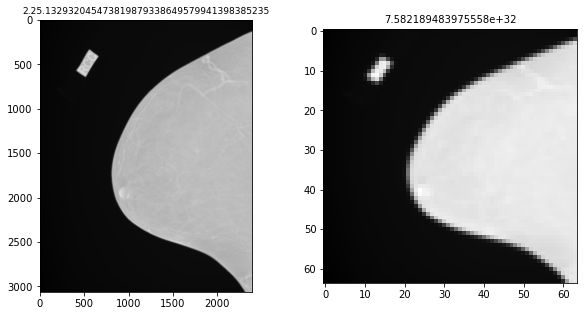

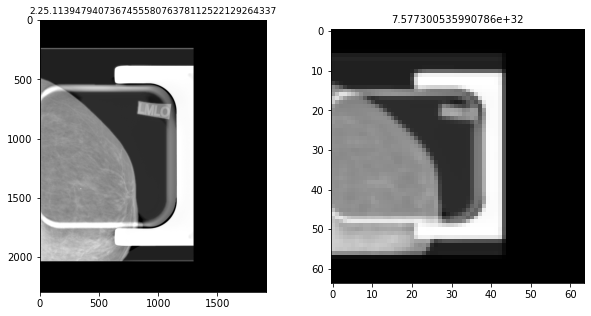

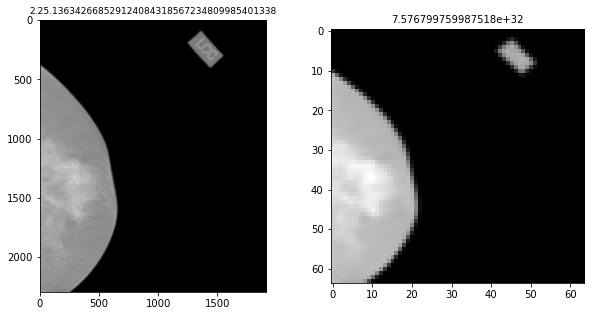

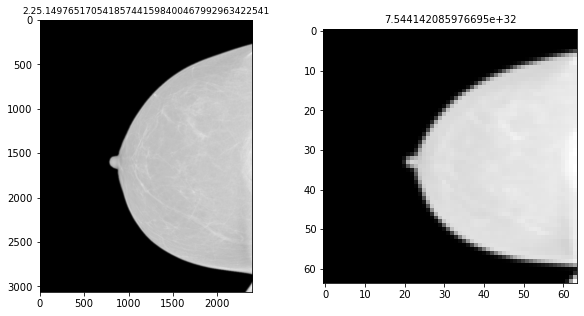

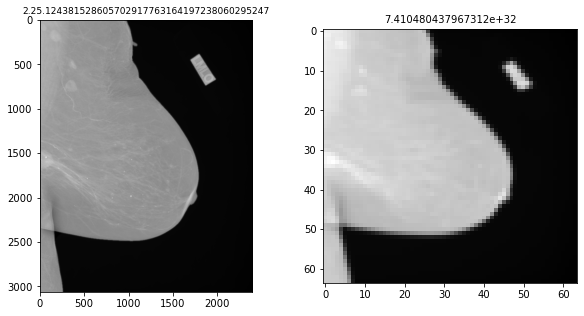

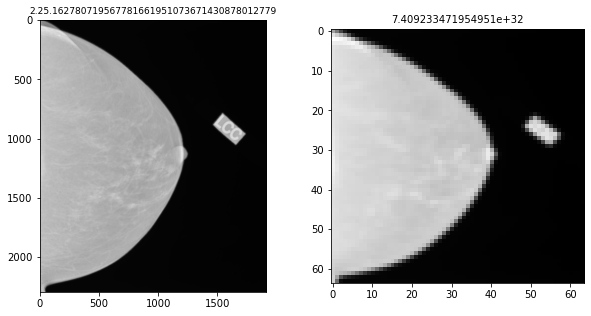

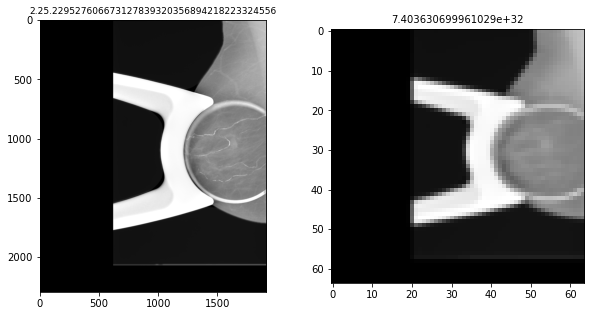

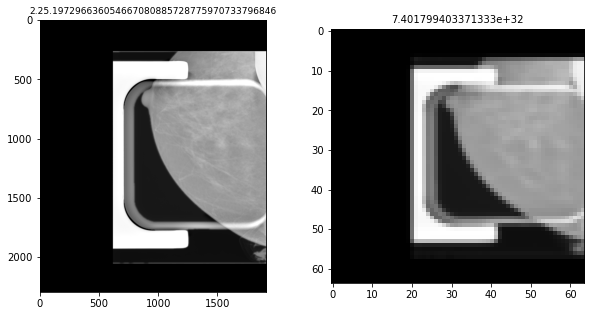

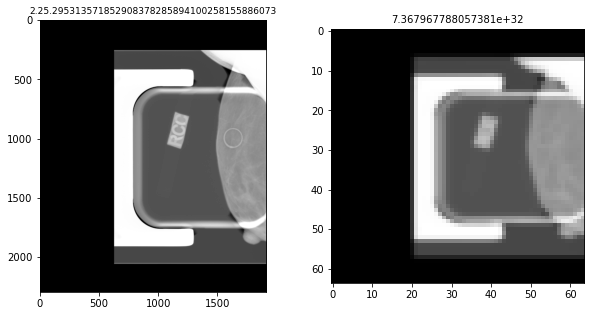

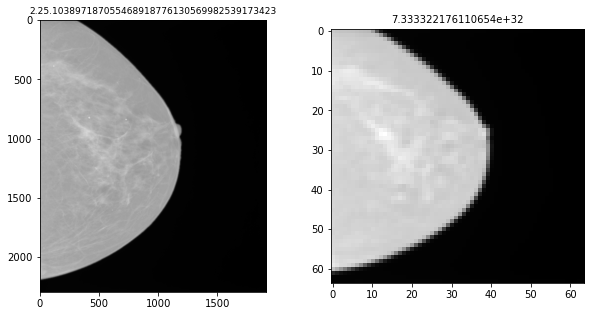

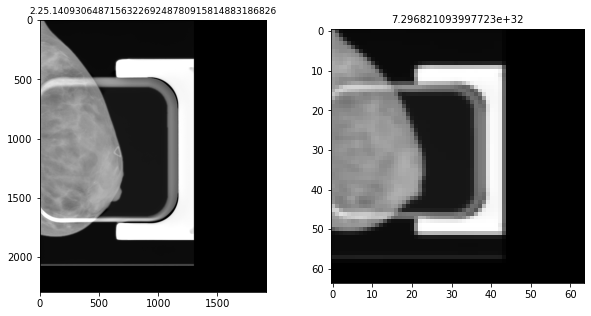

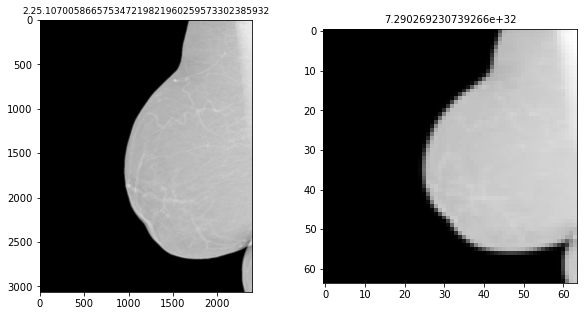

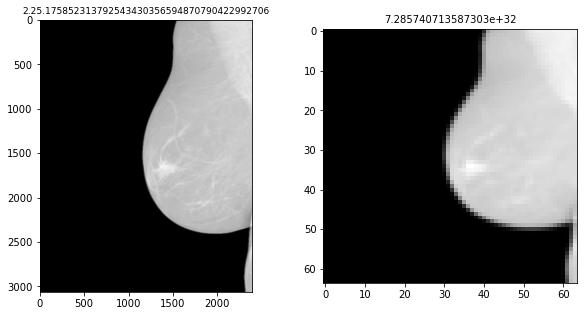

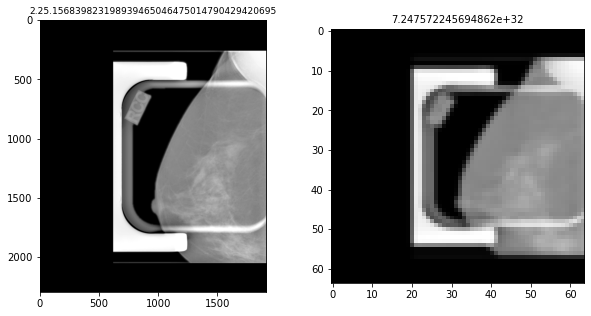

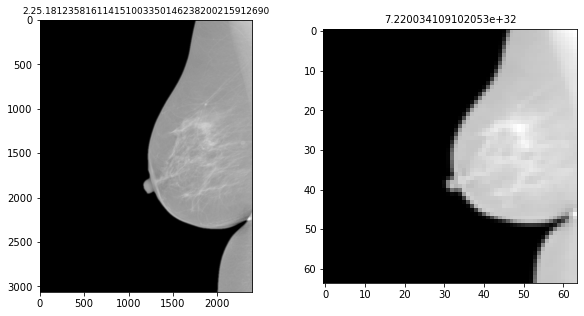

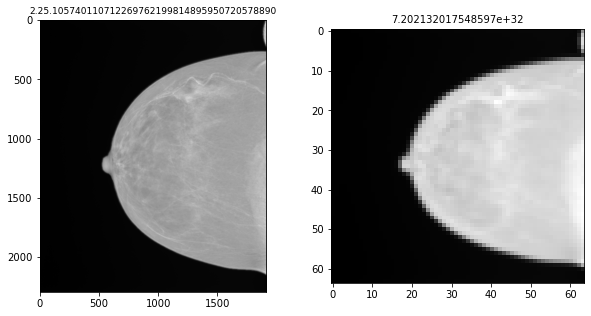

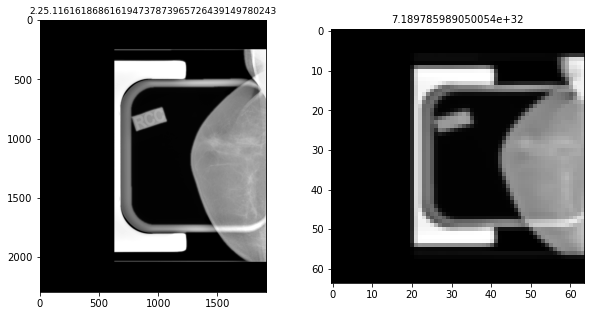

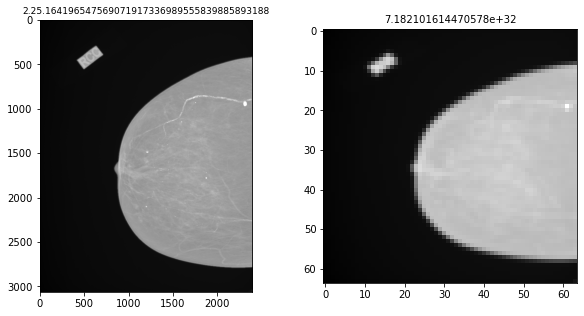

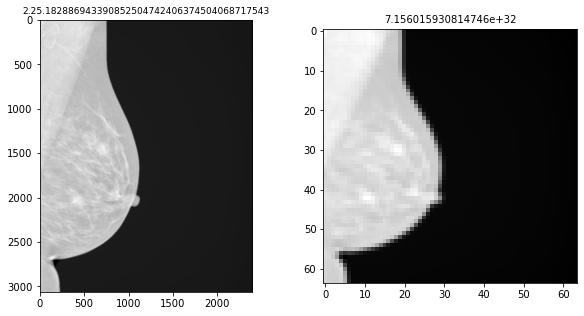

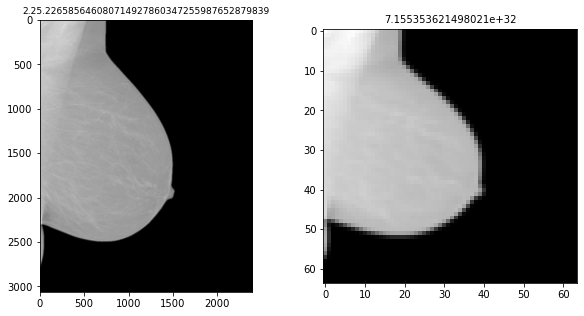

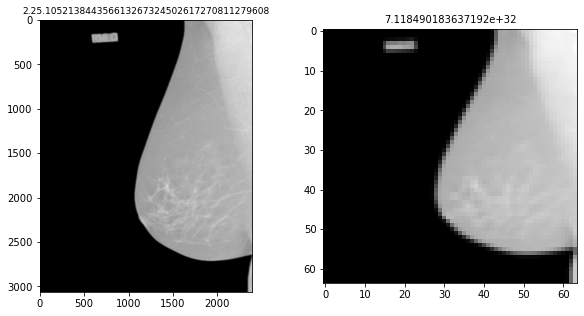

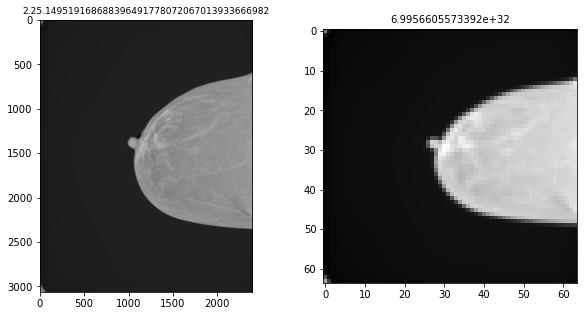

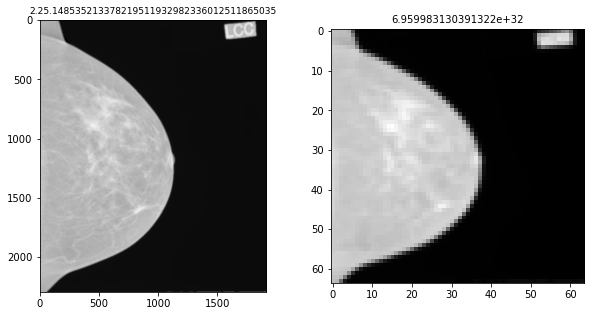

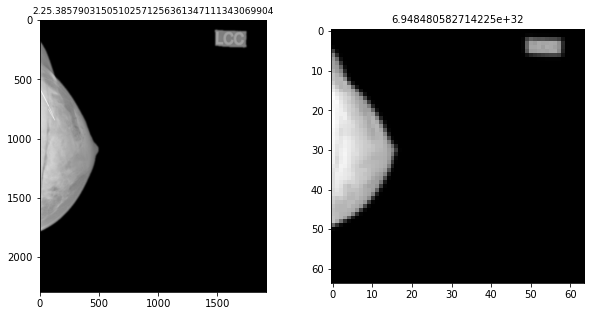

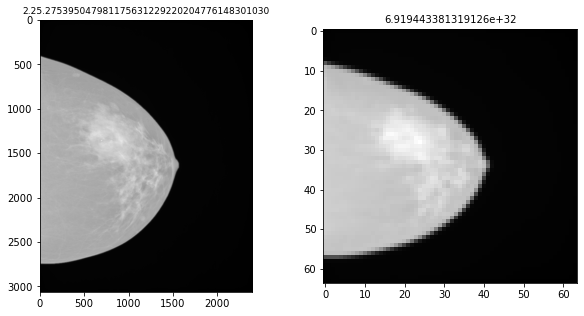

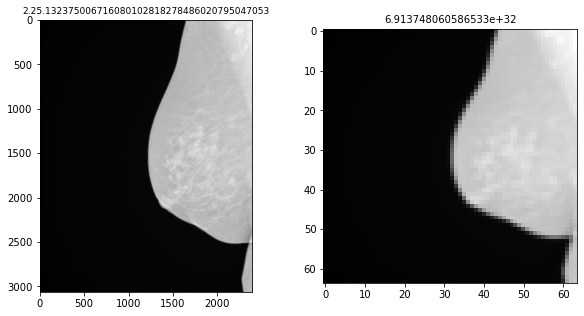

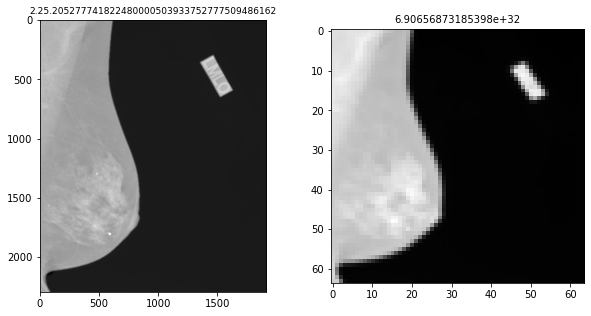

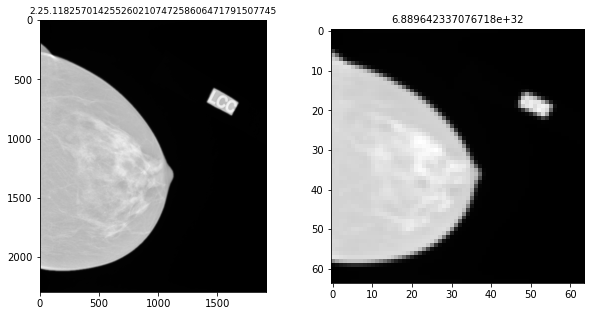

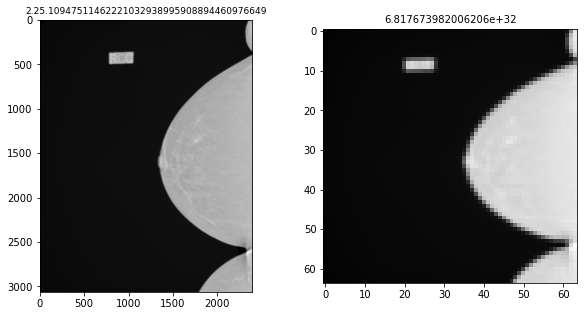

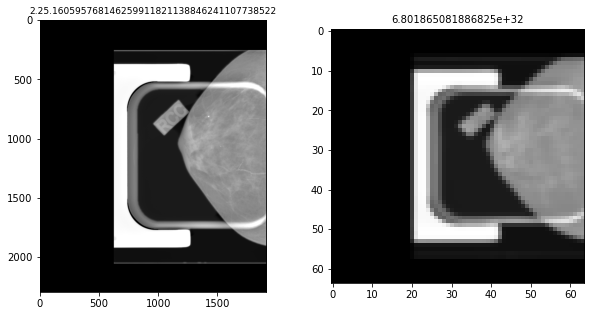

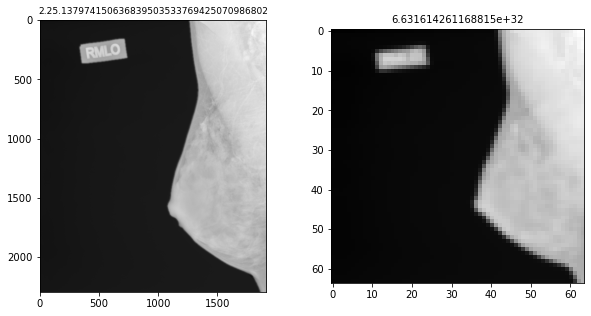

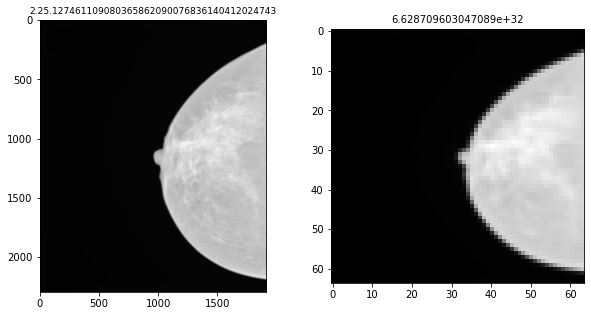

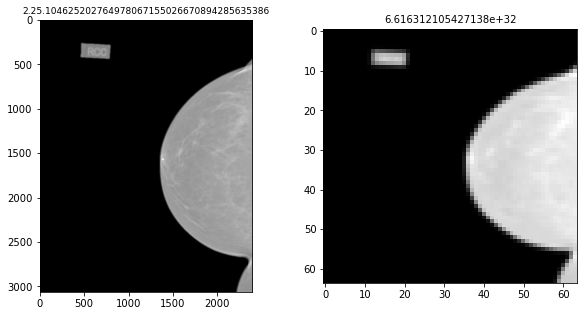

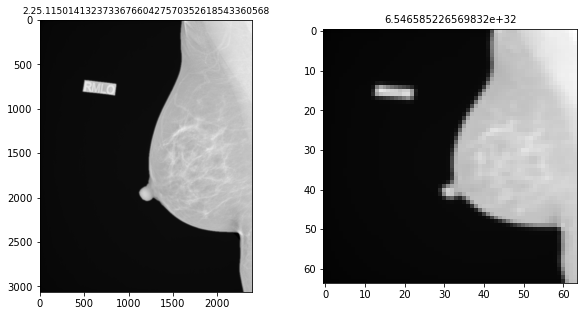

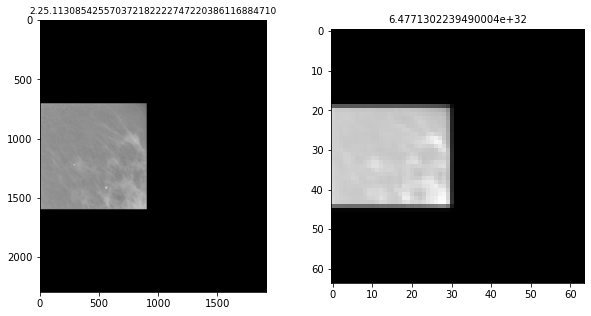

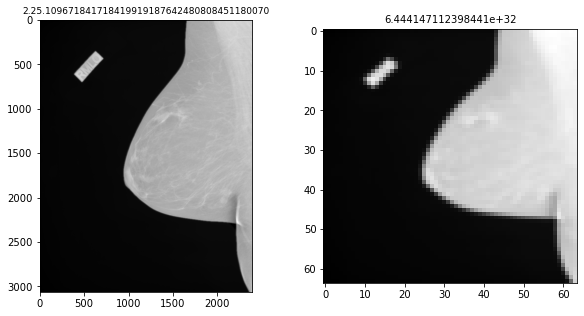

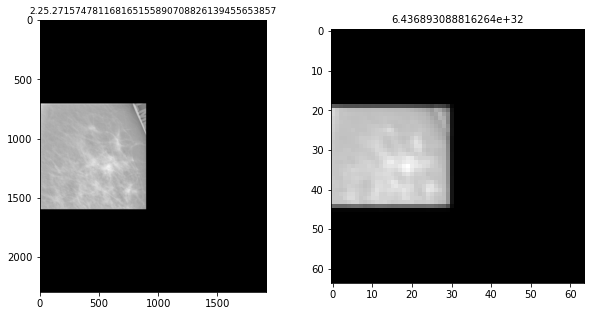

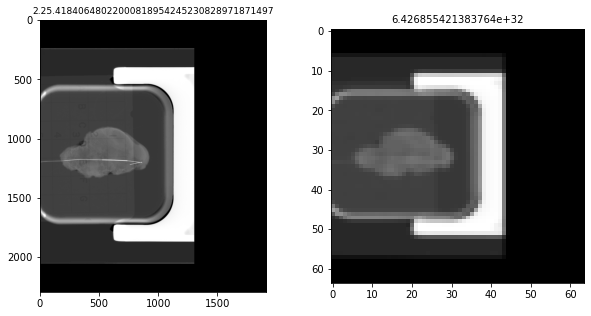

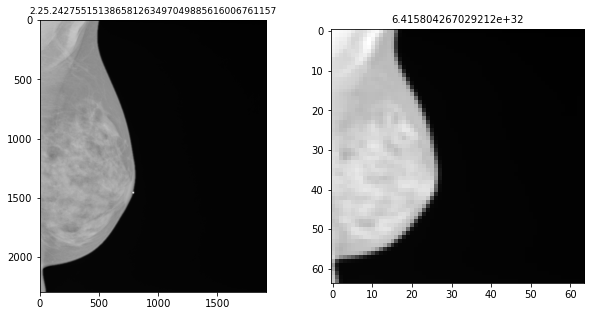

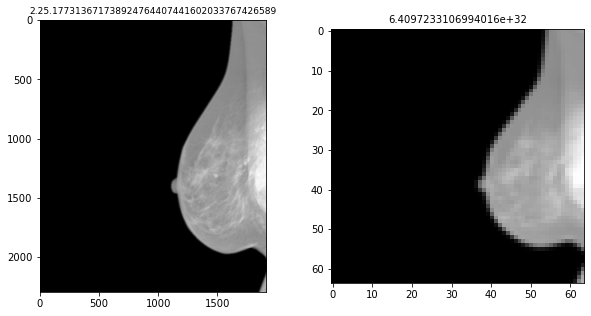

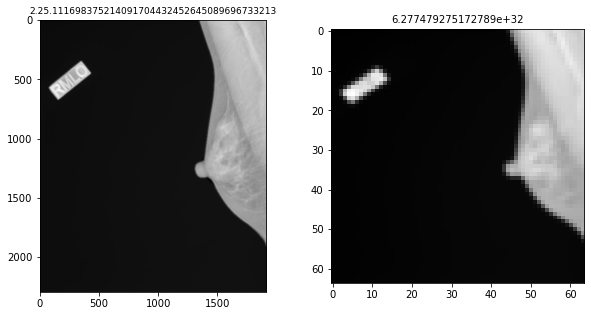

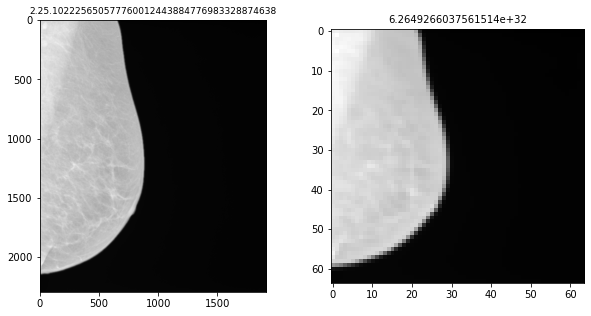

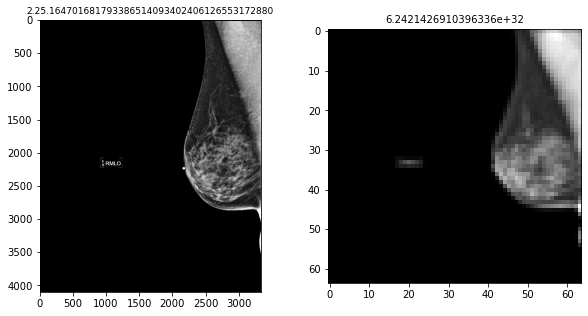

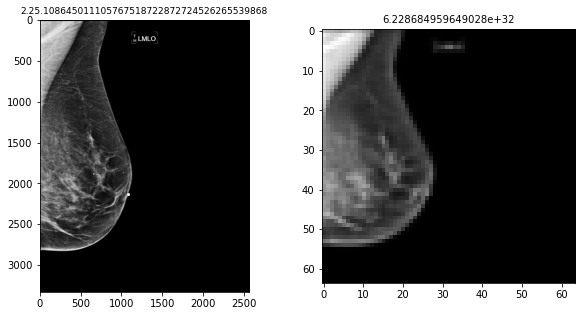

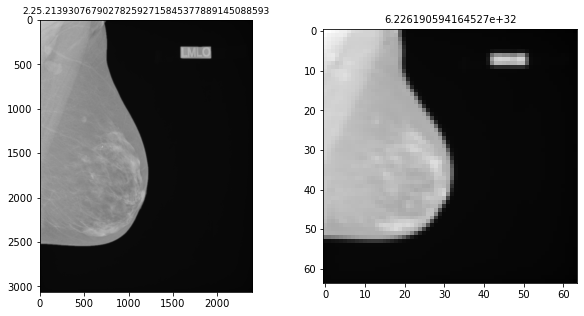

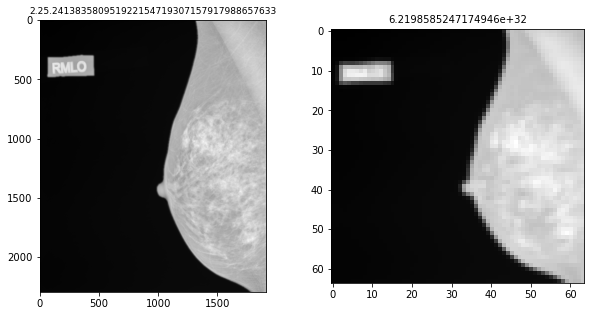

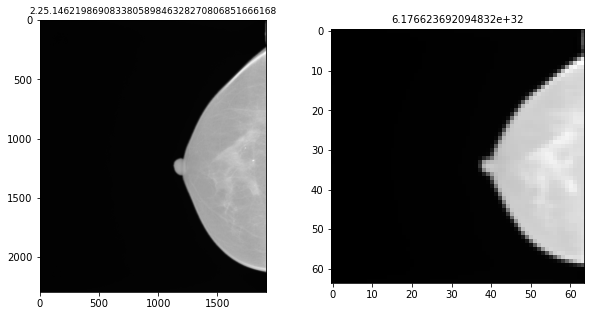

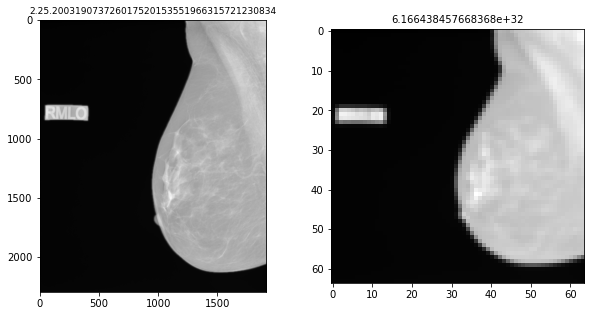

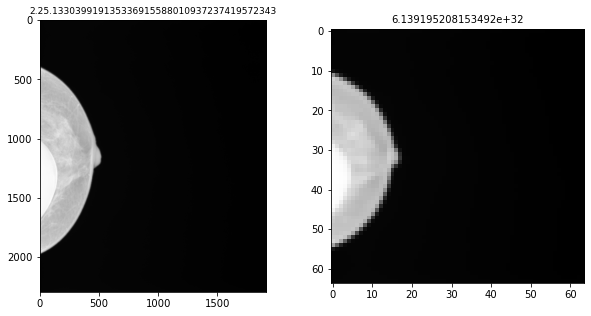

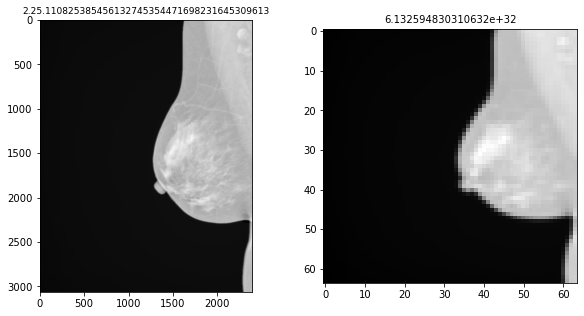

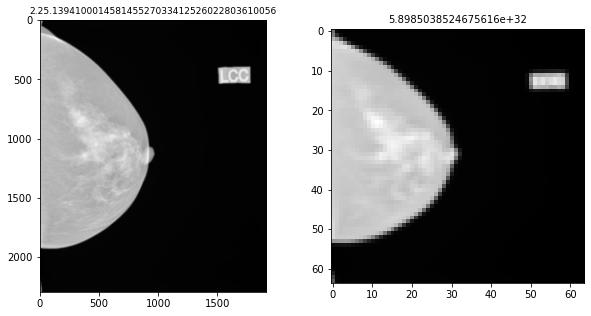

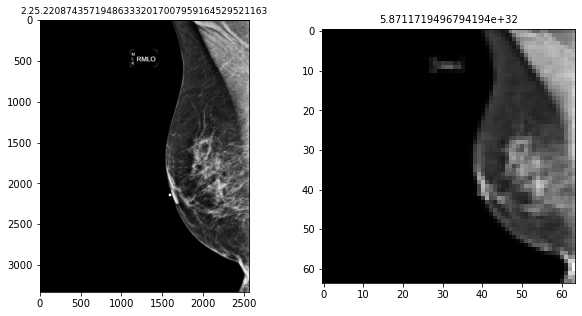

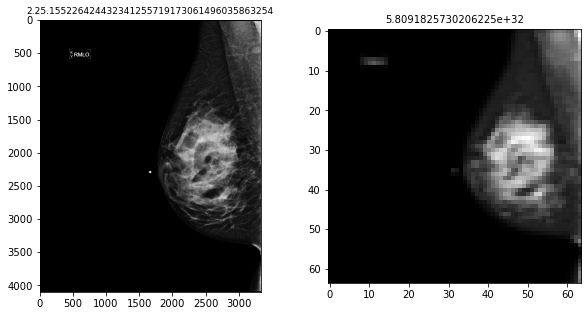

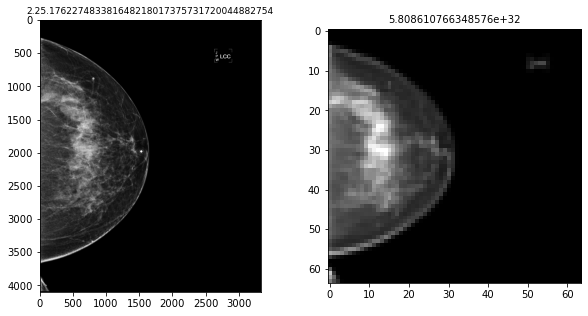

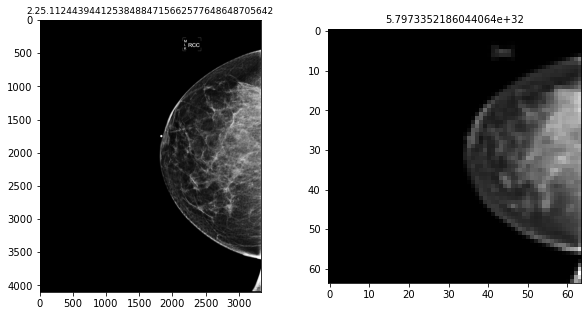

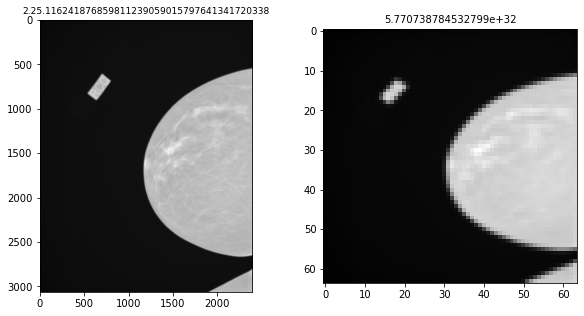

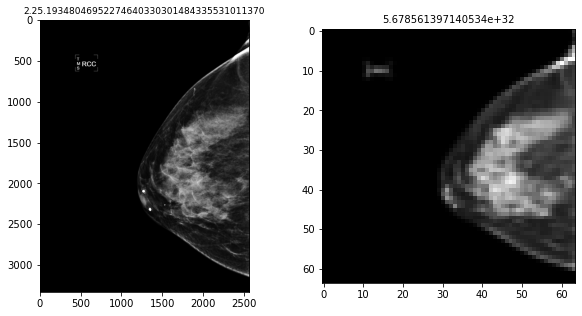

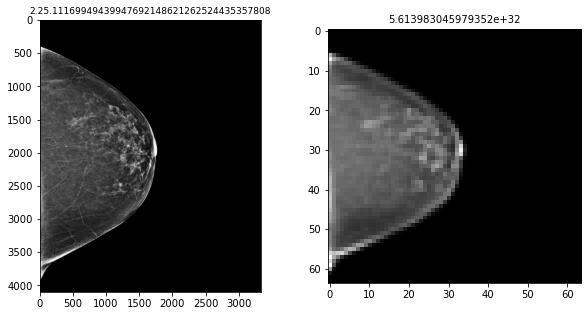

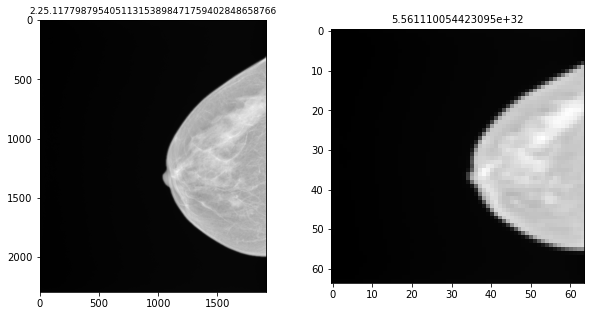

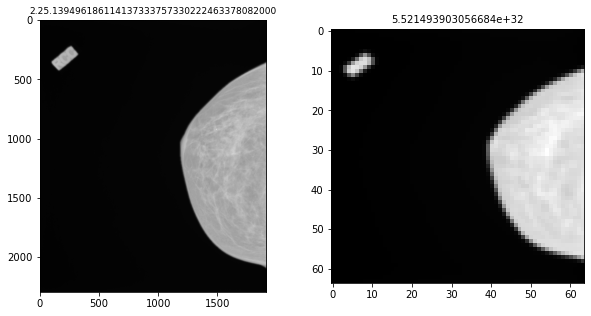

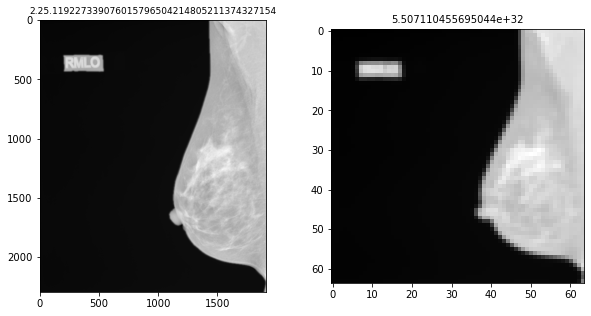

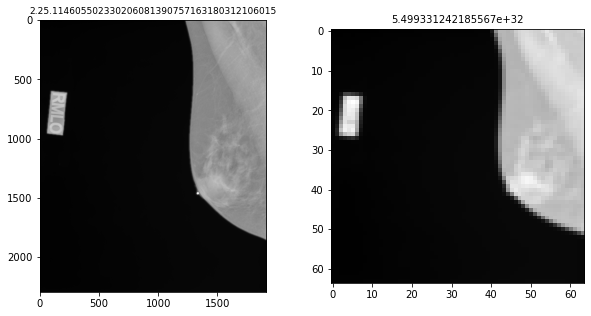

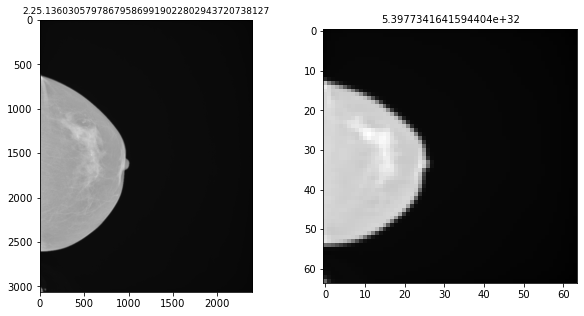

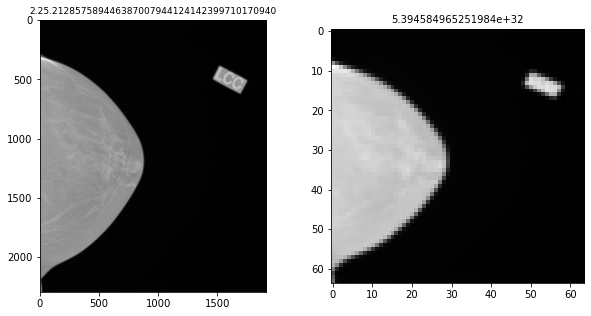

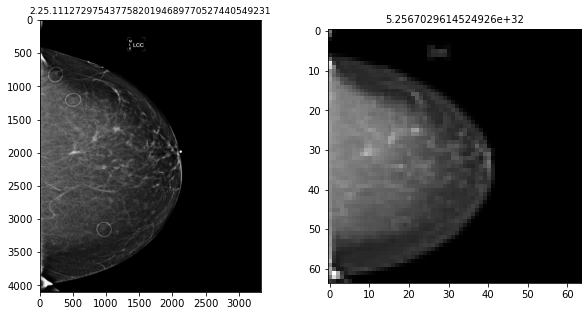

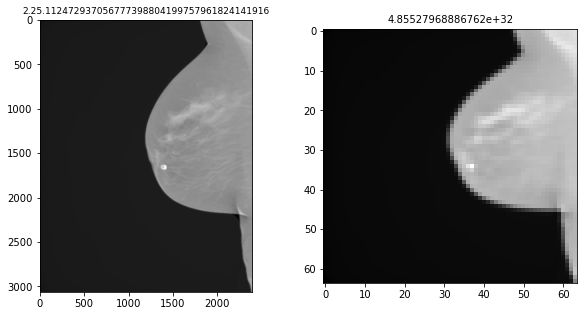

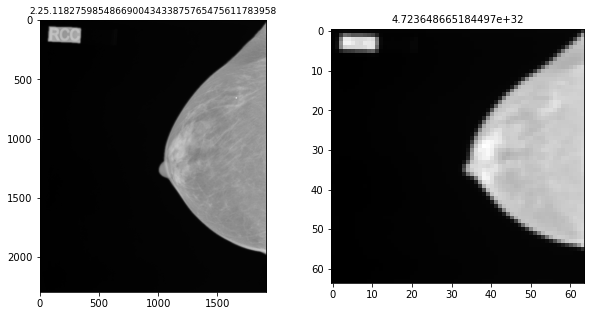

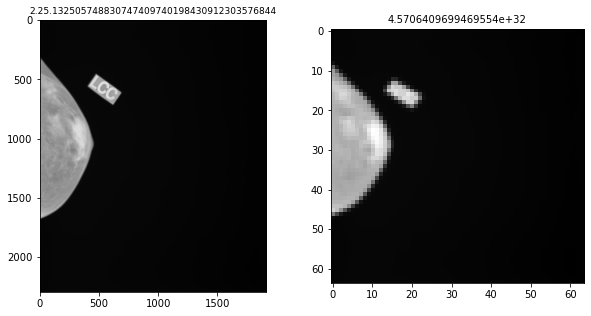

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='PCA')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])